In [75]:
# TODO: don't use from_pandas, just do it myself with nodes and edges and actual node IDs

In [1]:
import networkx as nx
import pandas as pd

In [22]:
PHILOSOPHY = "https://en.wikipedia.org/wiki/Philosophy"

In [28]:
edges = pd.read_csv(
    "../outputs/wiki_web.tsv",
    delimiter="\t",
    header=0,
    names=["source", "target"]
)
G = nx.from_pandas_edgelist(edges)

In [74]:
seeds = (
    pd.read_table("../outputs/seeds.txt", header=None, names=["url"])
    .assign(color="green")
    .set_index("url")
    ["color"]
    .to_dict()
)
seeds[PHILOSOPHY] = "red"
seeds

{'https://en.wikipedia.org/wiki/Physwick_Hostel,_Cambridge': 'green',
 'https://en.wikipedia.org/wiki/Lipna,_Vladimir_Oblast': 'green',
 'https://en.wikipedia.org/wiki/Philosophy': 'red'}

In [65]:
nodes = (
    pd.concat( [edges["source"], edges["target"]])
    .drop_duplicates()
    .to_frame("url")
    .assign(
        color = lambda df: df.url.map(seeds).fillna("blue")
    )
    .set_index("url")
)
nodes

,color
url,
"https://en.wikipedia.org/wiki/Lipna,_Vladimir_Oblast",green
https://en.wikipedia.org/wiki/University_of_Cambridge,blue
https://en.wikipedia.org/wiki/Public_university,blue
https://en.wikipedia.org/wiki/University,blue
https://en.wikipedia.org/wiki/Educational_institution,blue
https://en.wikipedia.org/wiki/Education,blue
https://en.wikipedia.org/wiki/Knowledge,blue
https://en.wikipedia.org/wiki/Declarative_knowledge,blue
https://en.wikipedia.org/wiki/Awareness,blue


In [66]:
G.add_nodes_from((n, dict(d)) for n, d in nodes.iterrows())

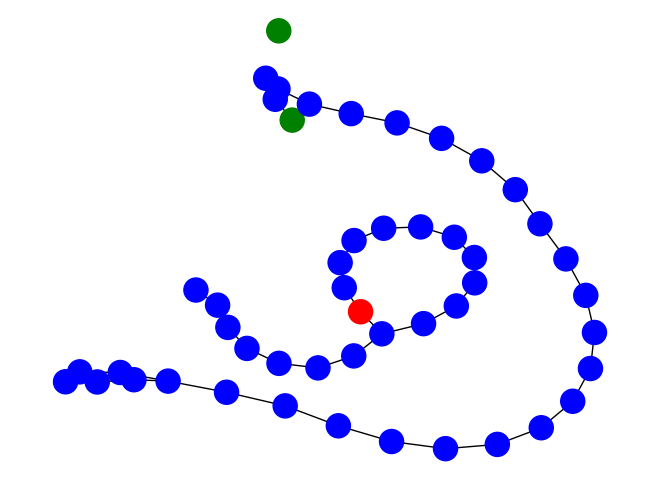

In [71]:
nx.draw(G, node_color=[G.nodes[node]["color"] for node in list(G.nodes())])
